# Пермякова Елизавета(НПМбд-01-20)

# 5.3 МНК, полиномиальная регрессия

### 1. Полиномиальная регрессия

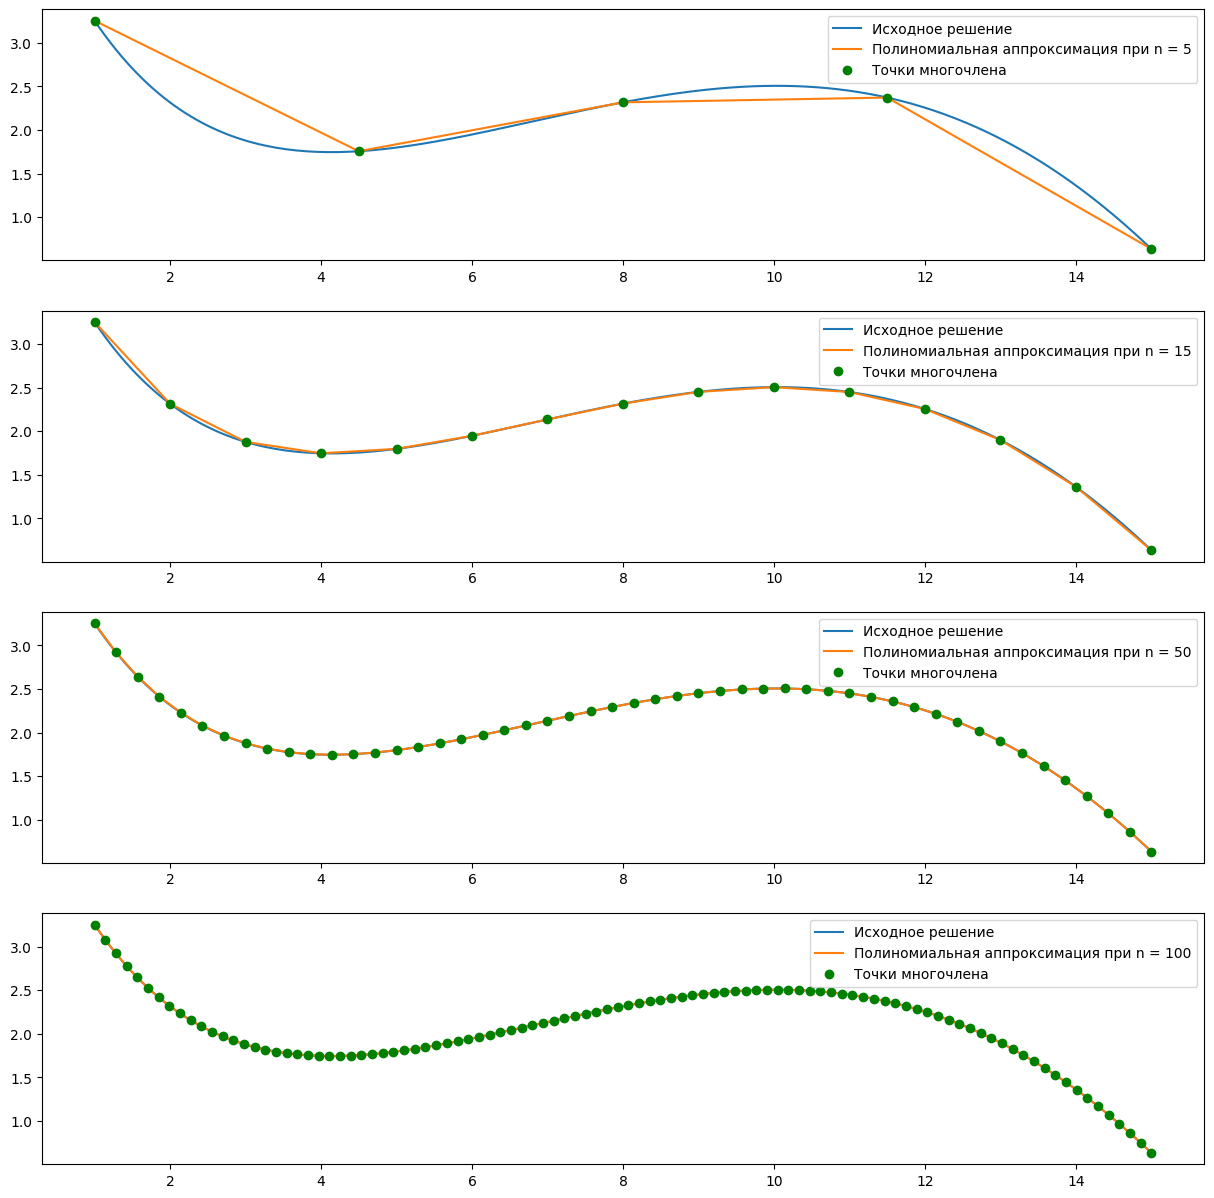

In [43]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def f(x): 
    return np.sin(x/5) * np.e ** (x/10) + 5 * np.e**(-1/2*x)

def PolyAprox(n):
    t = np.linspace(1, 15, n)
    A = np.array([[x ** i for i in range(n)] for x in t])
    b = f(t)
    C = np.linalg.solve(A, b)
    polyn = np.array([sum([C[i] * x**i for i in range(n)]) for x in t])
    return polyn, b

fig, axes = plt.subplots(4, figsize=(15, 15))
x = np.linspace(1, 15, 200)
y = f(x)

axes[0].plot(x, y, label = "Исходное решение")
axes[1].plot(x, y, label = "Исходное решение")
axes[2].plot(x, y, label = "Исходное решение")
axes[3].plot(x, y, label = "Исходное решение")

x = np.linspace(1, 15, 5)
y, b = PolyAprox(5)
axes[0].plot(x, y, label = "Полиномиальная аппроксимация при n = 5")
axes[0].plot(x, b, "go", label = "Точки многочлена")
axes[0].legend()

x = np.linspace(1, 15, 15)
y, b = PolyAprox(15)
axes[1].plot(x, y, label = "Полиномиальная аппроксимация при n = 15")
axes[1].plot(x, b, "go", label = "Точки многочлена")
axes[1].legend()

x = np.linspace(1, 15, 50)
y, b = PolyAprox(50)
axes[2].plot(x, y, label = "Полиномиальная аппроксимация при n = 50")
axes[2].plot(x, b, "go", label = "Точки многочлена")
axes[2].legend()

x = np.linspace(1, 15, 100)
y, b = PolyAprox(100)
axes[3].plot(x, y, label = "Полиномиальная аппроксимация при n = 100")
axes[3].plot(x, b, "go", label = "Точки многочлена")
axes[3].legend()

### Вывод: полином приближает функцию лучше при увеличении числа точек n. При n = 5 полином сильно неточен, но уже при n = 15 почти совпадает с исходным решением (при n = 50 и n = 100 картина еще лучше).

### 2. Полиномиальная регрессия с зашумлённым данными

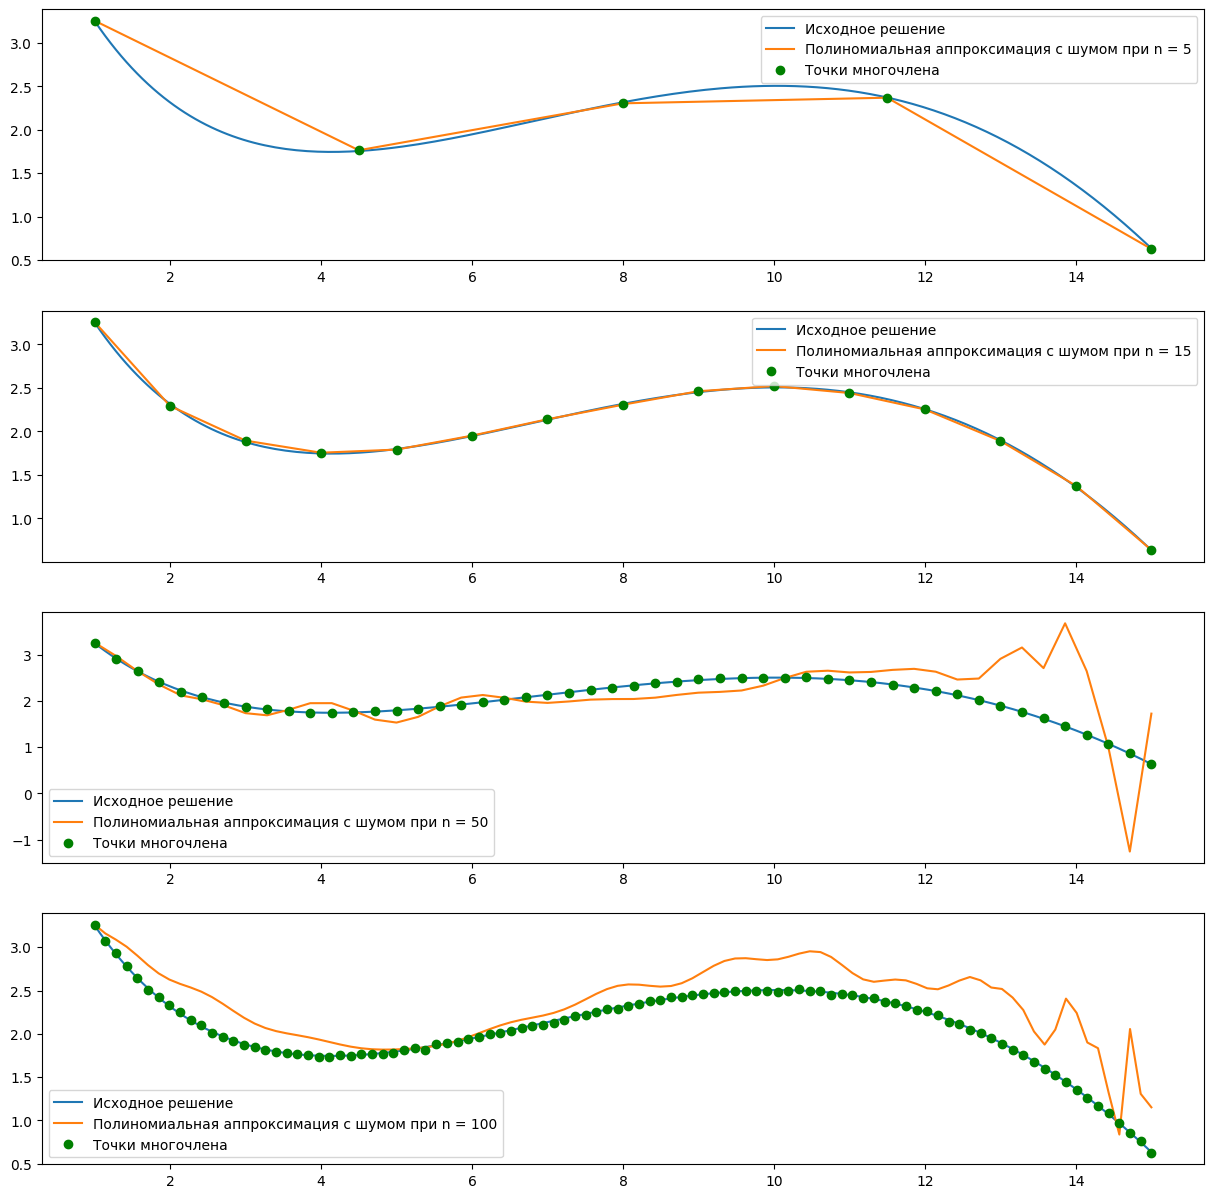

In [44]:
def PolyAproxWithNoise(n):
    t = np.linspace(1, 15, n)
    noise = np.random.normal(0, 0.01, n)
    A = np.array([[x ** i for i in range(n)] for x in t])
    b = f(t) + noise
    C = np.linalg.solve(A, b)
    polyn = np.array([sum([C[i] * x**i for i in range(n)]) for x in t])
    return polyn, b

fig, axes = plt.subplots(4, figsize=(15, 15))
x = np.linspace(1, 15, 200)
y = f(x)

axes[0].plot(x, y, label = "Исходное решение")
axes[1].plot(x, y, label = "Исходное решение")
axes[2].plot(x, y, label = "Исходное решение")
axes[3].plot(x, y, label = "Исходное решение")

x = np.linspace(1, 15, 5)
y, b = PolyAproxWithNoise(5)
axes[0].plot(x, y, label = "Полиномиальная аппроксимация с шумом при n = 5")
axes[0].plot(x, b, "go", label = "Точки многочлена")
axes[0].legend()

x = np.linspace(1, 15, 15)
y, b = PolyAproxWithNoise(15)
axes[1].plot(x, y, label = "Полиномиальная аппроксимация с шумом при n = 15")
axes[1].plot(x, b, "go", label = "Точки многочлена")
axes[1].legend()

x = np.linspace(1, 15, 50)
y, b = PolyAproxWithNoise(50)
axes[2].plot(x, y, label = "Полиномиальная аппроксимация с шумом при n = 50")
axes[2].plot(x, b, "go", label = "Точки многочлена")
axes[2].legend()

x = np.linspace(1, 15, 100)
y, b = PolyAproxWithNoise(100)
axes[3].plot(x, y, label = "Полиномиальная аппроксимация с шумом при n = 100")
axes[3].plot(x, b, "go", label = "Точки многочлена")
axes[3].legend()

### При n = 5 и n = 15 мы получаем почти ту же картину. Но при увеличении количества точек (больше 15) шум начинает влиять на апроксимацию, она начинает скакать. Наибольшую точность здесь получили при n = 15, и в общем при меньших n получаем отсутсвие скачков.

### 3. Метод наименьших квадратов

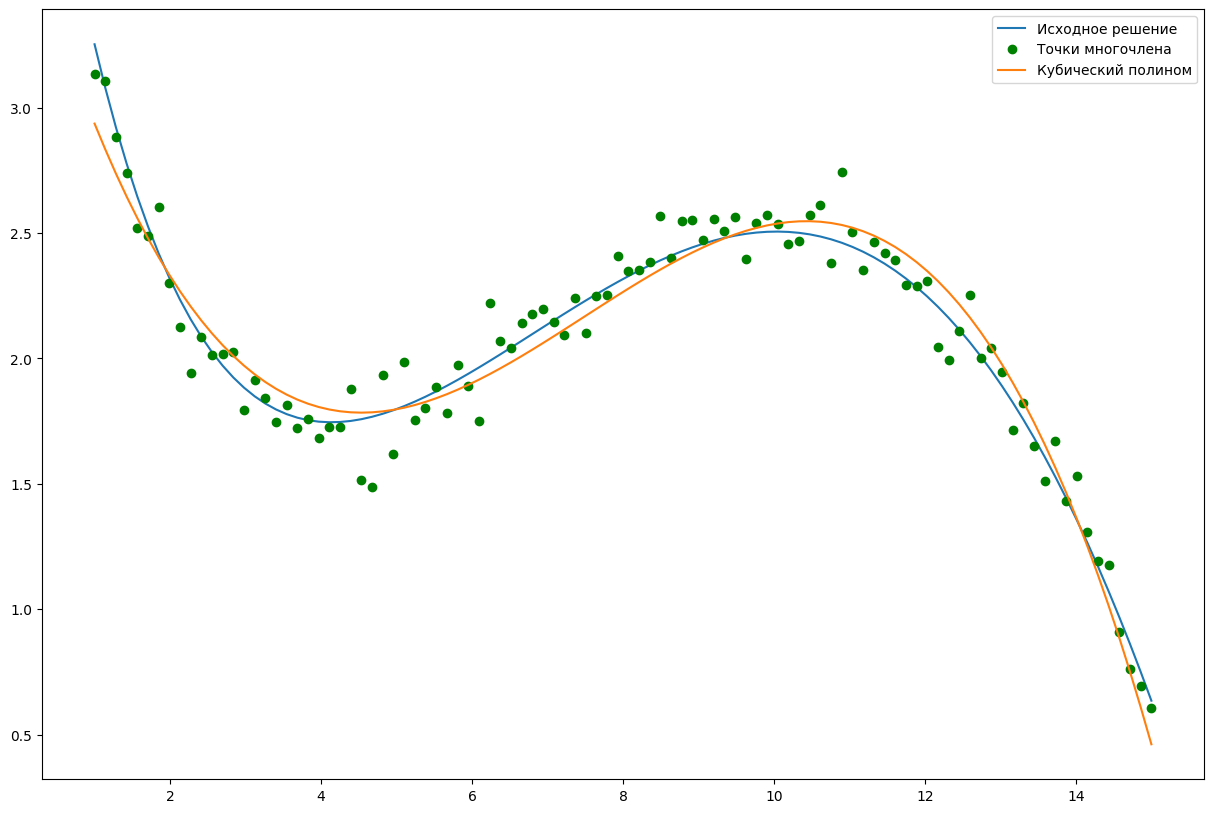

In [52]:
def MethodSquares(N):
    n = 4 #кубический полином: n = 4
    noise = np.random.normal(0, 0.1, N)
    t = np.linspace(1, 15, N)
    A = np.array([[x ** i for i in range(n)] for x in t])
    b = f(t) + noise
    C, d, e, g = np.linalg.lstsq(A, b, rcond=None)
    polyn = np.array([sum([C[i] * x**i for i in range(n)]) for x in t])
    return polyn, b

N = 100
plt.figure(figsize=(15, 10))
x = np.linspace(1, 15, 100)
y = f(x)
plt.plot(x, y, label = "Исходное решение")

x = np.linspace(1, 15, 100)
y, b = MethodSquares(100)

plt.plot(x, b, "go", label = "Точки многочлена")
plt.plot(x, y, label = "Кубический полином")
plt.legend()

## Вывод: полиномиальная регрессия без шумов дает хорошее приближение при больших n; регрессия с шумами, наоборот, дает лучший результат при меньших n, а при увеличении степени двигается скачкообразно; метод наименьших квадратов дает достаточно точное решение уже при кубическом полиноме - намного точнее, чем полиномиальная регрессия.